## CHEST X-RAY PNEUMONIA

#### Import required libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import pandas as pd
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

## TRAIN

In [2]:
train_x=[]

path=r'xray\train\PNEUMONIA\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [3]:
a=len(train_x)
train_y=np.zeros(a)

In [4]:
path=r'xray\train\covid1000n\*'


for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [5]:
b=len(train_x)
trainy=np.concatenate((train_y,np.ones(b-a)))

In [6]:
path=r'xray\train\NORMAL\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [7]:
c=len(train_x)
trainyy=np.concatenate((trainy,np.full(c-b, 2.)))

In [8]:
trainx = np.stack(train_x) # Converts the list of arrays to a array of arrays

In [9]:
tx,vx,ty,vy=train_test_split(trainx,trainyy)

In [10]:
ty = tf.keras.utils.to_categorical(ty,3)
vy = tf.keras.utils.to_categorical(vy,3)

## TEST

In [11]:
test_x=[]

path=r'xray\test\PNEUMONIA\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [12]:
a=len(test_x)
test_y=np.zeros(a)

In [13]:
path=r'xray\test\covid1000\*'


for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [14]:
b=len(test_x)
testy=np.concatenate((test_y,np.ones(b-a)))

In [15]:
path=r'xray\test\NORMAL\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') #converts RGB images to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))

In [16]:
c=len(test_x)
testyy=np.concatenate((testy,np.full(c-b, 2.)))

In [17]:
testx = np.stack(test_x) # Converts the list of arrays to a array of arrays

In [20]:
trainX = trainx.reshape(5948,100,100)
testX = testx.reshape(851,100,100)
trainy = trainyy
testy = testyy

In [21]:
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (5948, 100, 100) (5948,)
Test (851, 100, 100) (851,)


# Test before GAN

In [22]:
tf.random.set_seed(1234)
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5) # to prevent overfitting

model=tf.keras.Sequential(
[
    layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Dropout(0.25),
            
    layers.Conv2D(40, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(8, 8)),
    layers.Dropout(0.2),  
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3,activation='softmax')

    
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
mod=model.fit(tx,ty,validation_data=(vx,vy),batch_size=200,epochs=40,callbacks=[es])

Train on 4461 samples, validate on 1487 samples
Epoch 1/40
4461/4461 [==============================] - 3s 721us/sample - loss: 9.4147 - accuracy: 0.4667 - val_loss: 1.1533 - val_accuracy: 0.1930
Epoch 2/40
4461/4461 [==============================] - 1s 313us/sample - loss: 0.9040 - accuracy: 0.6259 - val_loss: 0.9901 - val_accuracy: 0.6980
Epoch 3/40
4461/4461 [==============================] - 1s 310us/sample - loss: 0.7868 - accuracy: 0.6667 - val_loss: 0.9337 - val_accuracy: 0.6866
Epoch 4/40
4461/4461 [==============================] - 1s 313us/sample - loss: 0.6611 - accuracy: 0.7054 - val_loss: 0.7796 - val_accuracy: 0.7283
Epoch 5/40
4461/4461 [==============================] - 1s 313us/sample - loss: 0.5350 - accuracy: 0.7821 - val_loss: 0.6489 - val_accuracy: 0.8070
Epoch 6/40
4461/4461 [==============================] - 1s 313us/sample - loss: 0.4608 - accuracy: 0.8092 - val_loss: 0.5568 - val_accuracy: 0.8366
Epoch 7/40
4461/4461 [==============================] - 1s 316us

In [23]:
pred=model.predict_classes(testx)
mys = []
l=0
for i in range(len(pred)):
    if pred[i]==testyy[i]:
        mys.append(1)
        l+=1
    else:
        mys.append(0)
print('Accuracy: ',l/len(testx))

Accuracy:  0.7931844888366627


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2)

In [40]:
tf.random.set_seed(1234)
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5) # to prevent overfitting

model=tf.keras.Sequential(
[
    layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Dropout(0.25),
            
    layers.Conv2D(40, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(8, 8)),
    layers.Dropout(0.2),  
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3,activation='softmax')

    
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
mod=model.fit(datagen.flow(tx,ty,batch_size=32),validation_data=datagen.flow(vx,vy,batch_size=32),epochs=60,callbacks=[es])

  ...
    to  
  ['...']
Train for 153 steps, validate for 51 steps
Epoch 1/60
153/153 [==============================] - 5s 32ms/step - loss: 2.3505 - accuracy: 0.5789 - val_loss: 1.0037 - val_accuracy: 0.6341
Epoch 2/60
153/153 [==============================] - 4s 29ms/step - loss: 0.8223 - accuracy: 0.6442 - val_loss: 0.8859 - val_accuracy: 0.6759
Epoch 3/60
153/153 [==============================] - 4s 29ms/step - loss: 0.7495 - accuracy: 0.6743 - val_loss: 0.8319 - val_accuracy: 0.6734
Epoch 4/60
153/153 [==============================] - 5s 30ms/step - loss: 0.6823 - accuracy: 0.7140 - val_loss: 0.7578 - val_accuracy: 0.7004
Epoch 5/60
153/153 [==============================] - 5s 30ms/step - loss: 0.6486 - accuracy: 0.7189 - val_loss: 0.7891 - val_accuracy: 0.6575
Epoch 6/60
153/153 [==============================] - 5s 31ms/step - loss: 0.6211 - accuracy: 0.7410 - val_loss: 0.6556 - val_accuracy: 0.7698
Epoch 7/60
153/153 [==============================] - 5s 31ms/step - loss:

153/153 [==============================] - 5s 31ms/step - loss: 0.3362 - accuracy: 0.8684 - val_loss: 0.3676 - val_accuracy: 0.8484
Epoch 58/60
153/153 [==============================] - 5s 31ms/step - loss: 0.3274 - accuracy: 0.8710 - val_loss: 0.2847 - val_accuracy: 0.9128
Epoch 59/60
153/153 [==============================] - 5s 31ms/step - loss: 0.3256 - accuracy: 0.8657 - val_loss: 0.2704 - val_accuracy: 0.9110
Epoch 60/60
153/153 [==============================] - 5s 31ms/step - loss: 0.3162 - accuracy: 0.8784 - val_loss: 0.2991 - val_accuracy: 0.9042


In [41]:
pred=model.predict_classes(testx)
mys = []
l=0
for i in range(len(pred)):
    if pred[i]==testyy[i]:
        mys.append(1)
        l+=1
    else:
        mys.append(0)
print('Accuracy: ',l/len(testx))

Accuracy:  0.8531139835487661


# GAN

In [25]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint

In [26]:
# define the standalone discriminator model
def define_discriminator(in_shape=(100,100,1), n_classes=3):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
 
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [27]:
# define the standalone generator model
def define_generator(latent_dim, n_classes=3):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 25 * 25
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((25, 25, 1))(li)
 

	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 25 * 25
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((25, 25, 128))(gen)
 
 	# feature fusion
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (25,25), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

In [28]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [29]:
# load fashion mnist images
def load_real_samples():
	# load dataset
	#(trainX, trainy), (_, _) = load_data()
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return [X, trainy]

# select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

In [30]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=3):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y

In [31]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))

In [32]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

>1, 1/46, d1=0.704, d2=0.696 g=0.692
>1, 2/46, d1=0.530, d2=0.710 g=0.681
>1, 3/46, d1=0.386, d2=0.740 g=0.672
>1, 4/46, d1=0.280, d2=0.750 g=0.728
>1, 5/46, d1=0.173, d2=0.638 g=0.867
>1, 6/46, d1=0.165, d2=0.600 g=0.848
>1, 7/46, d1=0.088, d2=0.643 g=0.765
>1, 8/46, d1=0.085, d2=0.745 g=0.672
>1, 9/46, d1=0.072, d2=0.897 g=0.574
>1, 10/46, d1=0.049, d2=1.040 g=0.537
>1, 11/46, d1=0.064, d2=1.008 g=0.616
>1, 12/46, d1=0.072, d2=0.727 g=0.917
>1, 13/46, d1=0.080, d2=0.476 g=1.222
>1, 14/46, d1=0.050, d2=0.463 g=1.120
>1, 15/46, d1=0.068, d2=0.551 g=0.907
>1, 16/46, d1=0.067, d2=0.637 g=0.781
>1, 17/46, d1=0.045, d2=0.677 g=0.739
>1, 18/46, d1=0.106, d2=0.678 g=0.739
>1, 19/46, d1=0.109, d2=0.671 g=0.748
>1, 20/46, d1=0.089, d2=0.664 g=0.769
>1, 21/46, d1=0.020, d2=0.641 g=0.822
>1, 22/46, d1=0.025, d2=0.574 g=0.970
>1, 23/46, d1=0.026, d2=0.460 g=1.153
>1, 24/46, d1=0.043, d2=0.427 g=1.158
>1, 25/46, d1=0.038, d2=0.440 g=1.112
>1, 26/46, d1=0.042, d2=0.424 g=1.143
>1, 27/46, d1=0.044, 

>5, 34/46, d1=0.627, d2=0.647 g=0.935
>5, 35/46, d1=0.768, d2=0.692 g=0.910
>5, 36/46, d1=0.607, d2=0.676 g=0.918
>5, 37/46, d1=0.625, d2=0.641 g=0.957
>5, 38/46, d1=0.582, d2=0.685 g=1.039
>5, 39/46, d1=0.604, d2=0.664 g=0.929
>5, 40/46, d1=0.583, d2=0.721 g=1.019
>5, 41/46, d1=0.623, d2=0.696 g=0.964
>5, 42/46, d1=0.560, d2=0.654 g=0.946
>5, 43/46, d1=0.614, d2=0.591 g=0.909
>5, 44/46, d1=0.598, d2=0.621 g=0.971
>5, 45/46, d1=0.682, d2=0.639 g=0.978
>5, 46/46, d1=0.734, d2=0.640 g=0.944
>6, 1/46, d1=0.600, d2=0.621 g=0.939
>6, 2/46, d1=0.698, d2=0.587 g=0.989
>6, 3/46, d1=0.642, d2=0.654 g=1.009
>6, 4/46, d1=0.577, d2=0.593 g=0.976
>6, 5/46, d1=0.643, d2=0.609 g=0.979
>6, 6/46, d1=0.643, d2=0.589 g=0.907
>6, 7/46, d1=0.675, d2=0.670 g=0.927
>6, 8/46, d1=0.618, d2=0.671 g=0.902
>6, 9/46, d1=0.657, d2=0.713 g=0.870
>6, 10/46, d1=0.591, d2=0.607 g=0.950
>6, 11/46, d1=0.709, d2=0.590 g=0.950
>6, 12/46, d1=0.593, d2=0.581 g=0.995
>6, 13/46, d1=0.555, d2=0.692 g=1.017
>6, 14/46, d1=0.609, 

>10, 21/46, d1=0.598, d2=0.629 g=0.912
>10, 22/46, d1=0.601, d2=0.754 g=0.978
>10, 23/46, d1=0.645, d2=0.615 g=0.922
>10, 24/46, d1=0.615, d2=0.626 g=0.962
>10, 25/46, d1=0.625, d2=0.628 g=0.906
>10, 26/46, d1=0.602, d2=0.613 g=0.927
>10, 27/46, d1=0.588, d2=0.645 g=0.972
>10, 28/46, d1=0.639, d2=0.687 g=0.895
>10, 29/46, d1=0.700, d2=0.662 g=0.909
>10, 30/46, d1=0.682, d2=0.693 g=0.899
>10, 31/46, d1=0.615, d2=0.658 g=0.904
>10, 32/46, d1=0.622, d2=0.677 g=0.889
>10, 33/46, d1=0.672, d2=0.762 g=0.899
>10, 34/46, d1=0.633, d2=0.607 g=0.908
>10, 35/46, d1=0.659, d2=0.668 g=0.910
>10, 36/46, d1=0.709, d2=0.576 g=0.955
>10, 37/46, d1=0.601, d2=0.593 g=1.023
>10, 38/46, d1=0.708, d2=0.617 g=1.018
>10, 39/46, d1=0.590, d2=0.641 g=1.018
>10, 40/46, d1=0.601, d2=0.635 g=1.015
>10, 41/46, d1=0.687, d2=0.577 g=1.048
>10, 42/46, d1=0.605, d2=0.569 g=1.072
>10, 43/46, d1=0.578, d2=0.612 g=1.058
>10, 44/46, d1=0.675, d2=0.582 g=0.987
>10, 45/46, d1=0.610, d2=0.640 g=0.991
>10, 46/46, d1=0.649, d2=

>15, 3/46, d1=0.624, d2=0.535 g=1.035
>15, 4/46, d1=0.665, d2=0.587 g=0.983
>15, 5/46, d1=0.633, d2=0.622 g=0.921
>15, 6/46, d1=0.550, d2=0.697 g=0.934
>15, 7/46, d1=0.709, d2=0.636 g=0.921
>15, 8/46, d1=0.672, d2=0.621 g=0.905
>15, 9/46, d1=0.606, d2=0.558 g=0.936
>15, 10/46, d1=0.619, d2=0.581 g=0.985
>15, 11/46, d1=0.590, d2=0.574 g=1.041
>15, 12/46, d1=0.671, d2=0.606 g=1.050
>15, 13/46, d1=0.706, d2=0.609 g=1.106
>15, 14/46, d1=0.633, d2=0.633 g=1.047
>15, 15/46, d1=0.577, d2=0.636 g=1.069
>15, 16/46, d1=0.708, d2=0.540 g=0.975
>15, 17/46, d1=0.641, d2=0.607 g=0.887
>15, 18/46, d1=0.716, d2=0.643 g=0.912
>15, 19/46, d1=0.629, d2=0.676 g=0.852
>15, 20/46, d1=0.677, d2=0.673 g=0.906
>15, 21/46, d1=0.587, d2=0.639 g=0.963
>15, 22/46, d1=0.536, d2=0.622 g=1.051
>15, 23/46, d1=0.578, d2=0.673 g=1.016
>15, 24/46, d1=0.571, d2=0.614 g=0.972
>15, 25/46, d1=0.651, d2=0.636 g=0.907
>15, 26/46, d1=0.650, d2=0.643 g=0.923
>15, 27/46, d1=0.613, d2=0.663 g=0.841
>15, 28/46, d1=0.518, d2=0.733 g

>19, 31/46, d1=0.699, d2=0.549 g=1.126
>19, 32/46, d1=0.588, d2=0.530 g=0.993
>19, 33/46, d1=0.726, d2=0.701 g=0.932
>19, 34/46, d1=0.678, d2=0.696 g=0.879
>19, 35/46, d1=0.669, d2=0.608 g=0.893
>19, 36/46, d1=0.660, d2=0.663 g=0.902
>19, 37/46, d1=0.631, d2=0.712 g=0.852
>19, 38/46, d1=0.596, d2=0.627 g=0.847
>19, 39/46, d1=0.632, d2=0.660 g=0.878
>19, 40/46, d1=0.564, d2=0.697 g=0.948
>19, 41/46, d1=0.647, d2=0.684 g=0.848
>19, 42/46, d1=0.573, d2=0.672 g=0.908
>19, 43/46, d1=0.595, d2=0.650 g=0.910
>19, 44/46, d1=0.630, d2=0.688 g=0.884
>19, 45/46, d1=0.631, d2=0.640 g=0.832
>19, 46/46, d1=0.560, d2=0.663 g=0.900
>20, 1/46, d1=0.557, d2=0.695 g=0.928
>20, 2/46, d1=0.632, d2=0.637 g=0.959
>20, 3/46, d1=0.664, d2=0.642 g=0.932
>20, 4/46, d1=0.661, d2=0.564 g=0.925
>20, 5/46, d1=0.676, d2=0.653 g=0.996
>20, 6/46, d1=0.679, d2=0.646 g=0.961
>20, 7/46, d1=0.666, d2=0.513 g=0.974
>20, 8/46, d1=0.699, d2=0.646 g=0.924
>20, 9/46, d1=0.604, d2=0.670 g=0.941
>20, 10/46, d1=0.629, d2=0.605 g=0

>24, 13/46, d1=0.702, d2=0.600 g=0.869
>24, 14/46, d1=0.568, d2=0.660 g=0.824
>24, 15/46, d1=0.758, d2=0.724 g=0.873
>24, 16/46, d1=0.611, d2=0.713 g=0.872
>24, 17/46, d1=0.549, d2=0.685 g=0.886
>24, 18/46, d1=0.649, d2=0.637 g=0.916
>24, 19/46, d1=0.589, d2=0.604 g=0.926
>24, 20/46, d1=0.639, d2=0.594 g=0.900
>24, 21/46, d1=0.597, d2=0.609 g=0.894
>24, 22/46, d1=0.662, d2=0.643 g=0.911
>24, 23/46, d1=0.678, d2=0.607 g=0.874
>24, 24/46, d1=0.625, d2=0.656 g=0.817
>24, 25/46, d1=0.619, d2=0.716 g=0.863
>24, 26/46, d1=0.599, d2=0.704 g=0.864
>24, 27/46, d1=0.557, d2=0.604 g=0.943
>24, 28/46, d1=0.649, d2=0.700 g=1.045
>24, 29/46, d1=0.608, d2=0.598 g=0.955
>24, 30/46, d1=0.586, d2=0.580 g=1.041
>24, 31/46, d1=0.608, d2=0.564 g=0.924
>24, 32/46, d1=0.787, d2=0.597 g=0.990
>24, 33/46, d1=0.631, d2=0.633 g=0.899
>24, 34/46, d1=0.637, d2=0.576 g=0.930
>24, 35/46, d1=0.622, d2=0.647 g=0.858
>24, 36/46, d1=0.662, d2=0.637 g=0.930
>24, 37/46, d1=0.620, d2=0.660 g=0.899
>24, 38/46, d1=0.681, d2=

>28, 40/46, d1=0.563, d2=0.617 g=1.009
>28, 41/46, d1=0.558, d2=0.573 g=0.968
>28, 42/46, d1=0.627, d2=0.578 g=0.967
>28, 43/46, d1=0.634, d2=0.655 g=0.916
>28, 44/46, d1=0.658, d2=0.615 g=0.921
>28, 45/46, d1=0.622, d2=0.650 g=0.850
>28, 46/46, d1=0.726, d2=0.657 g=0.876
>29, 1/46, d1=0.561, d2=0.602 g=0.920
>29, 2/46, d1=0.623, d2=0.574 g=0.915
>29, 3/46, d1=0.682, d2=0.624 g=0.981
>29, 4/46, d1=0.576, d2=0.562 g=0.945
>29, 5/46, d1=0.621, d2=0.613 g=0.891
>29, 6/46, d1=0.701, d2=0.639 g=0.939
>29, 7/46, d1=0.562, d2=0.613 g=0.884
>29, 8/46, d1=0.612, d2=0.672 g=0.955
>29, 9/46, d1=0.677, d2=0.669 g=0.898
>29, 10/46, d1=0.592, d2=0.600 g=0.878
>29, 11/46, d1=0.630, d2=0.635 g=0.914
>29, 12/46, d1=0.641, d2=0.638 g=0.959
>29, 13/46, d1=0.652, d2=0.612 g=0.886
>29, 14/46, d1=0.587, d2=0.517 g=0.955
>29, 15/46, d1=0.601, d2=0.663 g=0.867
>29, 16/46, d1=0.617, d2=0.660 g=0.886
>29, 17/46, d1=0.664, d2=0.640 g=0.888
>29, 18/46, d1=0.598, d2=0.574 g=0.866
>29, 19/46, d1=0.621, d2=0.711 g=0

>33, 22/46, d1=0.567, d2=0.624 g=0.951
>33, 23/46, d1=0.652, d2=0.573 g=0.922
>33, 24/46, d1=0.651, d2=0.639 g=0.935
>33, 25/46, d1=0.571, d2=0.606 g=0.924
>33, 26/46, d1=0.567, d2=0.629 g=0.966
>33, 27/46, d1=0.640, d2=0.572 g=0.939
>33, 28/46, d1=0.608, d2=0.542 g=0.952
>33, 29/46, d1=0.566, d2=0.560 g=0.971
>33, 30/46, d1=0.576, d2=0.635 g=0.971
>33, 31/46, d1=0.588, d2=0.691 g=0.951
>33, 32/46, d1=0.642, d2=0.640 g=0.905
>33, 33/46, d1=0.643, d2=0.613 g=0.941
>33, 34/46, d1=0.619, d2=0.619 g=0.944
>33, 35/46, d1=0.620, d2=0.642 g=0.941
>33, 36/46, d1=0.535, d2=0.664 g=0.898
>33, 37/46, d1=0.599, d2=0.685 g=0.858
>33, 38/46, d1=0.651, d2=0.687 g=0.912
>33, 39/46, d1=0.611, d2=0.616 g=0.901
>33, 40/46, d1=0.602, d2=0.539 g=0.974
>33, 41/46, d1=0.543, d2=0.646 g=1.042
>33, 42/46, d1=0.625, d2=0.613 g=0.931
>33, 43/46, d1=0.612, d2=0.516 g=0.921
>33, 44/46, d1=0.641, d2=0.622 g=0.916
>33, 45/46, d1=0.668, d2=0.733 g=0.891
>33, 46/46, d1=0.621, d2=0.586 g=0.922
>34, 1/46, d1=0.594, d2=0

>38, 4/46, d1=0.544, d2=0.617 g=1.031
>38, 5/46, d1=0.648, d2=0.647 g=0.994
>38, 6/46, d1=0.603, d2=0.615 g=0.983
>38, 7/46, d1=0.551, d2=0.584 g=0.948
>38, 8/46, d1=0.699, d2=0.629 g=0.949
>38, 9/46, d1=0.610, d2=0.591 g=0.947
>38, 10/46, d1=0.600, d2=0.592 g=0.971
>38, 11/46, d1=0.759, d2=0.605 g=0.892
>38, 12/46, d1=0.654, d2=0.592 g=0.955
>38, 13/46, d1=0.580, d2=0.584 g=0.923
>38, 14/46, d1=0.602, d2=0.745 g=0.897
>38, 15/46, d1=0.569, d2=0.651 g=0.933
>38, 16/46, d1=0.625, d2=0.596 g=0.887
>38, 17/46, d1=0.627, d2=0.657 g=0.938
>38, 18/46, d1=0.643, d2=0.611 g=0.934
>38, 19/46, d1=0.594, d2=0.650 g=0.988
>38, 20/46, d1=0.576, d2=0.678 g=0.959
>38, 21/46, d1=0.653, d2=0.589 g=0.917
>38, 22/46, d1=0.554, d2=0.654 g=0.935
>38, 23/46, d1=0.534, d2=0.558 g=0.910
>38, 24/46, d1=0.655, d2=0.648 g=0.953
>38, 25/46, d1=0.608, d2=0.606 g=0.996
>38, 26/46, d1=0.746, d2=0.655 g=0.949
>38, 27/46, d1=0.659, d2=0.637 g=0.881
>38, 28/46, d1=0.580, d2=0.718 g=0.902
>38, 29/46, d1=0.596, d2=0.624 

>42, 32/46, d1=0.671, d2=0.669 g=0.910
>42, 33/46, d1=0.675, d2=0.673 g=0.890
>42, 34/46, d1=0.649, d2=0.642 g=0.864
>42, 35/46, d1=0.669, d2=0.651 g=0.874
>42, 36/46, d1=0.583, d2=0.723 g=0.911
>42, 37/46, d1=0.688, d2=0.620 g=0.843
>42, 38/46, d1=0.640, d2=0.576 g=0.866
>42, 39/46, d1=0.625, d2=0.647 g=0.856
>42, 40/46, d1=0.613, d2=0.670 g=0.935
>42, 41/46, d1=0.589, d2=0.603 g=0.890
>42, 42/46, d1=0.657, d2=0.609 g=0.895
>42, 43/46, d1=0.631, d2=0.577 g=0.921
>42, 44/46, d1=0.673, d2=0.634 g=0.858
>42, 45/46, d1=0.555, d2=0.632 g=0.909
>42, 46/46, d1=0.629, d2=0.640 g=0.897
>43, 1/46, d1=0.614, d2=0.614 g=0.904
>43, 2/46, d1=0.684, d2=0.568 g=0.869
>43, 3/46, d1=0.654, d2=0.691 g=0.910
>43, 4/46, d1=0.564, d2=0.651 g=0.914
>43, 5/46, d1=0.688, d2=0.633 g=0.876
>43, 6/46, d1=0.590, d2=0.599 g=0.851
>43, 7/46, d1=0.574, d2=0.576 g=0.878
>43, 8/46, d1=0.574, d2=0.635 g=0.899
>43, 9/46, d1=0.645, d2=0.609 g=0.944
>43, 10/46, d1=0.601, d2=0.661 g=0.962
>43, 11/46, d1=0.653, d2=0.619 g=0

>47, 14/46, d1=0.642, d2=0.665 g=0.882
>47, 15/46, d1=0.558, d2=0.645 g=0.944
>47, 16/46, d1=0.659, d2=0.636 g=0.924
>47, 17/46, d1=0.629, d2=0.697 g=0.913
>47, 18/46, d1=0.599, d2=0.591 g=0.894
>47, 19/46, d1=0.688, d2=0.602 g=0.880
>47, 20/46, d1=0.596, d2=0.621 g=0.883
>47, 21/46, d1=0.659, d2=0.618 g=0.888
>47, 22/46, d1=0.679, d2=0.625 g=0.972
>47, 23/46, d1=0.553, d2=0.651 g=0.901
>47, 24/46, d1=0.646, d2=0.666 g=0.868
>47, 25/46, d1=0.577, d2=0.635 g=0.892
>47, 26/46, d1=0.603, d2=0.625 g=0.943
>47, 27/46, d1=0.567, d2=0.679 g=0.939
>47, 28/46, d1=0.621, d2=0.569 g=0.930
>47, 29/46, d1=0.644, d2=0.657 g=0.938
>47, 30/46, d1=0.619, d2=0.723 g=0.956
>47, 31/46, d1=0.631, d2=0.638 g=0.914
>47, 32/46, d1=0.676, d2=0.670 g=0.935
>47, 33/46, d1=0.652, d2=0.606 g=0.911
>47, 34/46, d1=0.644, d2=0.647 g=0.902
>47, 35/46, d1=0.542, d2=0.615 g=0.911
>47, 36/46, d1=0.625, d2=0.654 g=0.902
>47, 37/46, d1=0.677, d2=0.733 g=0.879
>47, 38/46, d1=0.678, d2=0.582 g=0.898
>47, 39/46, d1=0.648, d2=

>51, 41/46, d1=0.630, d2=0.656 g=0.880
>51, 42/46, d1=0.637, d2=0.628 g=0.869
>51, 43/46, d1=0.613, d2=0.683 g=0.941
>51, 44/46, d1=0.666, d2=0.603 g=0.874
>51, 45/46, d1=0.634, d2=0.630 g=0.896
>51, 46/46, d1=0.556, d2=0.691 g=0.911
>52, 1/46, d1=0.664, d2=0.646 g=0.864
>52, 2/46, d1=0.601, d2=0.688 g=0.867
>52, 3/46, d1=0.668, d2=0.628 g=0.887
>52, 4/46, d1=0.676, d2=0.603 g=0.881
>52, 5/46, d1=0.637, d2=0.717 g=0.814
>52, 6/46, d1=0.570, d2=0.627 g=0.919
>52, 7/46, d1=0.697, d2=0.612 g=0.901
>52, 8/46, d1=0.626, d2=0.648 g=0.870
>52, 9/46, d1=0.660, d2=0.684 g=0.895
>52, 10/46, d1=0.629, d2=0.579 g=0.917
>52, 11/46, d1=0.646, d2=0.656 g=0.906
>52, 12/46, d1=0.661, d2=0.639 g=0.932
>52, 13/46, d1=0.632, d2=0.644 g=0.903
>52, 14/46, d1=0.645, d2=0.661 g=0.875
>52, 15/46, d1=0.713, d2=0.625 g=0.798
>52, 16/46, d1=0.667, d2=0.606 g=0.858
>52, 17/46, d1=0.630, d2=0.632 g=0.862
>52, 18/46, d1=0.594, d2=0.640 g=0.888
>52, 19/46, d1=0.601, d2=0.634 g=0.912
>52, 20/46, d1=0.610, d2=0.694 g=0

>56, 23/46, d1=0.554, d2=0.670 g=0.975
>56, 24/46, d1=0.715, d2=0.647 g=0.926
>56, 25/46, d1=0.559, d2=0.604 g=0.904
>56, 26/46, d1=0.677, d2=0.550 g=0.956
>56, 27/46, d1=0.625, d2=0.613 g=0.913
>56, 28/46, d1=0.675, d2=0.659 g=0.927
>56, 29/46, d1=0.629, d2=0.677 g=0.972
>56, 30/46, d1=0.638, d2=0.625 g=0.915
>56, 31/46, d1=0.667, d2=0.683 g=0.841
>56, 32/46, d1=0.669, d2=0.712 g=0.884
>56, 33/46, d1=0.600, d2=0.639 g=0.802
>56, 34/46, d1=0.634, d2=0.627 g=0.863
>56, 35/46, d1=0.628, d2=0.611 g=0.925
>56, 36/46, d1=0.593, d2=0.660 g=0.912
>56, 37/46, d1=0.663, d2=0.623 g=0.881
>56, 38/46, d1=0.714, d2=0.644 g=0.891
>56, 39/46, d1=0.644, d2=0.610 g=0.930
>56, 40/46, d1=0.648, d2=0.605 g=0.917
>56, 41/46, d1=0.650, d2=0.660 g=0.911
>56, 42/46, d1=0.592, d2=0.692 g=0.879
>56, 43/46, d1=0.587, d2=0.662 g=0.941
>56, 44/46, d1=0.637, d2=0.663 g=0.876
>56, 45/46, d1=0.630, d2=0.665 g=0.890
>56, 46/46, d1=0.595, d2=0.545 g=0.936
>57, 1/46, d1=0.554, d2=0.713 g=0.951
>57, 2/46, d1=0.599, d2=0.

>61, 5/46, d1=0.557, d2=0.650 g=0.952
>61, 6/46, d1=0.569, d2=0.674 g=0.938
>61, 7/46, d1=0.571, d2=0.632 g=0.930
>61, 8/46, d1=0.646, d2=0.625 g=0.883
>61, 9/46, d1=0.680, d2=0.642 g=0.852
>61, 10/46, d1=0.621, d2=0.594 g=0.964
>61, 11/46, d1=0.569, d2=0.595 g=0.931
>61, 12/46, d1=0.683, d2=0.685 g=0.957
>61, 13/46, d1=0.597, d2=0.583 g=1.033
>61, 14/46, d1=0.663, d2=0.532 g=0.957
>61, 15/46, d1=0.659, d2=0.631 g=0.872
>61, 16/46, d1=0.610, d2=0.597 g=0.938
>61, 17/46, d1=0.618, d2=0.579 g=0.953
>61, 18/46, d1=0.646, d2=0.722 g=0.982
>61, 19/46, d1=0.626, d2=0.611 g=0.912
>61, 20/46, d1=0.616, d2=0.580 g=0.936
>61, 21/46, d1=0.689, d2=0.707 g=0.862
>61, 22/46, d1=0.667, d2=0.581 g=0.952
>61, 23/46, d1=0.596, d2=0.654 g=0.919
>61, 24/46, d1=0.624, d2=0.611 g=0.931
>61, 25/46, d1=0.640, d2=0.623 g=0.938
>61, 26/46, d1=0.574, d2=0.642 g=0.895
>61, 27/46, d1=0.617, d2=0.680 g=0.965
>61, 28/46, d1=0.665, d2=0.682 g=0.964
>61, 29/46, d1=0.607, d2=0.609 g=0.894
>61, 30/46, d1=0.669, d2=0.594

>65, 33/46, d1=0.662, d2=0.541 g=0.886
>65, 34/46, d1=0.578, d2=0.591 g=0.926
>65, 35/46, d1=0.609, d2=0.640 g=0.948
>65, 36/46, d1=0.707, d2=0.600 g=0.890
>65, 37/46, d1=0.600, d2=0.661 g=0.926
>65, 38/46, d1=0.641, d2=0.604 g=0.928
>65, 39/46, d1=0.613, d2=0.624 g=0.889
>65, 40/46, d1=0.659, d2=0.623 g=0.860
>65, 41/46, d1=0.561, d2=0.686 g=0.937
>65, 42/46, d1=0.621, d2=0.668 g=0.923
>65, 43/46, d1=0.658, d2=0.678 g=0.861
>65, 44/46, d1=0.561, d2=0.608 g=0.885
>65, 45/46, d1=0.602, d2=0.659 g=0.970
>65, 46/46, d1=0.593, d2=0.573 g=0.961
>66, 1/46, d1=0.584, d2=0.697 g=0.954
>66, 2/46, d1=0.704, d2=0.649 g=0.886
>66, 3/46, d1=0.593, d2=0.607 g=0.899
>66, 4/46, d1=0.601, d2=0.679 g=0.946
>66, 5/46, d1=0.725, d2=0.723 g=0.910
>66, 6/46, d1=0.578, d2=0.612 g=0.870
>66, 7/46, d1=0.652, d2=0.664 g=0.898
>66, 8/46, d1=0.660, d2=0.649 g=0.905
>66, 9/46, d1=0.602, d2=0.603 g=0.913
>66, 10/46, d1=0.656, d2=0.602 g=0.894
>66, 11/46, d1=0.543, d2=0.627 g=0.863
>66, 12/46, d1=0.799, d2=0.665 g=0

>70, 15/46, d1=0.570, d2=0.654 g=0.906
>70, 16/46, d1=0.681, d2=0.582 g=0.909
>70, 17/46, d1=0.538, d2=0.645 g=0.934
>70, 18/46, d1=0.656, d2=0.634 g=0.963
>70, 19/46, d1=0.604, d2=0.643 g=0.893
>70, 20/46, d1=0.638, d2=0.550 g=0.865
>70, 21/46, d1=0.641, d2=0.701 g=0.926
>70, 22/46, d1=0.611, d2=0.652 g=0.953
>70, 23/46, d1=0.679, d2=0.597 g=0.908
>70, 24/46, d1=0.693, d2=0.631 g=0.910
>70, 25/46, d1=0.623, d2=0.685 g=0.863
>70, 26/46, d1=0.551, d2=0.666 g=0.899
>70, 27/46, d1=0.688, d2=0.677 g=0.855
>70, 28/46, d1=0.666, d2=0.642 g=0.877
>70, 29/46, d1=0.699, d2=0.609 g=0.867
>70, 30/46, d1=0.528, d2=0.672 g=0.914
>70, 31/46, d1=0.690, d2=0.606 g=0.868
>70, 32/46, d1=0.627, d2=0.658 g=0.844
>70, 33/46, d1=0.641, d2=0.600 g=0.855
>70, 34/46, d1=0.670, d2=0.718 g=0.915
>70, 35/46, d1=0.626, d2=0.702 g=0.859
>70, 36/46, d1=0.583, d2=0.671 g=0.992
>70, 37/46, d1=0.636, d2=0.630 g=0.897
>70, 38/46, d1=0.685, d2=0.576 g=0.890
>70, 39/46, d1=0.604, d2=0.616 g=0.925
>70, 40/46, d1=0.652, d2=

>74, 42/46, d1=0.650, d2=0.692 g=0.904
>74, 43/46, d1=0.622, d2=0.626 g=0.850
>74, 44/46, d1=0.670, d2=0.655 g=0.940
>74, 45/46, d1=0.687, d2=0.721 g=0.882
>74, 46/46, d1=0.596, d2=0.653 g=0.896
>75, 1/46, d1=0.679, d2=0.647 g=0.917
>75, 2/46, d1=0.645, d2=0.606 g=0.895
>75, 3/46, d1=0.582, d2=0.622 g=0.892
>75, 4/46, d1=0.570, d2=0.579 g=0.972
>75, 5/46, d1=0.667, d2=0.653 g=0.869
>75, 6/46, d1=0.679, d2=0.620 g=0.909
>75, 7/46, d1=0.573, d2=0.588 g=0.995
>75, 8/46, d1=0.641, d2=0.630 g=0.902
>75, 9/46, d1=0.582, d2=0.634 g=0.882
>75, 10/46, d1=0.604, d2=0.720 g=0.887
>75, 11/46, d1=0.618, d2=0.641 g=0.881
>75, 12/46, d1=0.583, d2=0.626 g=0.911
>75, 13/46, d1=0.642, d2=0.629 g=0.952
>75, 14/46, d1=0.675, d2=0.618 g=0.910
>75, 15/46, d1=0.616, d2=0.623 g=0.877
>75, 16/46, d1=0.628, d2=0.691 g=0.944
>75, 17/46, d1=0.661, d2=0.593 g=0.938
>75, 18/46, d1=0.630, d2=0.662 g=0.949
>75, 19/46, d1=0.655, d2=0.675 g=0.927
>75, 20/46, d1=0.718, d2=0.590 g=0.929
>75, 21/46, d1=0.623, d2=0.621 g=0

>79, 24/46, d1=0.585, d2=0.682 g=0.954
>79, 25/46, d1=0.598, d2=0.626 g=0.810
>79, 26/46, d1=0.709, d2=0.539 g=0.896
>79, 27/46, d1=0.647, d2=0.624 g=0.958
>79, 28/46, d1=0.653, d2=0.651 g=0.944
>79, 29/46, d1=0.684, d2=0.603 g=0.889
>79, 30/46, d1=0.593, d2=0.581 g=0.987
>79, 31/46, d1=0.664, d2=0.708 g=0.940
>79, 32/46, d1=0.685, d2=0.667 g=0.873
>79, 33/46, d1=0.632, d2=0.587 g=0.874
>79, 34/46, d1=0.640, d2=0.615 g=0.864
>79, 35/46, d1=0.627, d2=0.683 g=0.892
>79, 36/46, d1=0.632, d2=0.638 g=0.978
>79, 37/46, d1=0.576, d2=0.657 g=0.868
>79, 38/46, d1=0.692, d2=0.631 g=0.890
>79, 39/46, d1=0.582, d2=0.604 g=0.929
>79, 40/46, d1=0.548, d2=0.554 g=0.923
>79, 41/46, d1=0.645, d2=0.722 g=0.908
>79, 42/46, d1=0.655, d2=0.631 g=0.903
>79, 43/46, d1=0.648, d2=0.648 g=0.944
>79, 44/46, d1=0.598, d2=0.621 g=0.893
>79, 45/46, d1=0.601, d2=0.618 g=1.020
>79, 46/46, d1=0.641, d2=0.623 g=0.984
>80, 1/46, d1=0.649, d2=0.626 g=0.847
>80, 2/46, d1=0.597, d2=0.579 g=0.948
>80, 3/46, d1=0.581, d2=0.6

>84, 6/46, d1=0.556, d2=0.692 g=0.998
>84, 7/46, d1=0.503, d2=0.635 g=0.963
>84, 8/46, d1=0.692, d2=0.559 g=0.943
>84, 9/46, d1=0.638, d2=0.548 g=0.950
>84, 10/46, d1=0.653, d2=0.584 g=0.902
>84, 11/46, d1=0.685, d2=0.660 g=0.865
>84, 12/46, d1=0.603, d2=0.627 g=1.008
>84, 13/46, d1=0.678, d2=0.664 g=0.987
>84, 14/46, d1=0.694, d2=0.658 g=0.905
>84, 15/46, d1=0.617, d2=0.643 g=0.847
>84, 16/46, d1=0.587, d2=0.712 g=0.858
>84, 17/46, d1=0.620, d2=0.550 g=0.917
>84, 18/46, d1=0.575, d2=0.663 g=0.963
>84, 19/46, d1=0.583, d2=0.660 g=0.921
>84, 20/46, d1=0.653, d2=0.672 g=0.910
>84, 21/46, d1=0.655, d2=0.625 g=0.930
>84, 22/46, d1=0.708, d2=0.622 g=0.982
>84, 23/46, d1=0.594, d2=0.671 g=0.941
>84, 24/46, d1=0.617, d2=0.557 g=0.914
>84, 25/46, d1=0.610, d2=0.608 g=0.948
>84, 26/46, d1=0.566, d2=0.630 g=0.929
>84, 27/46, d1=0.680, d2=0.584 g=0.950
>84, 28/46, d1=0.614, d2=0.609 g=1.005
>84, 29/46, d1=0.599, d2=0.599 g=0.900
>84, 30/46, d1=0.619, d2=0.550 g=0.892
>84, 31/46, d1=0.567, d2=0.64

>88, 34/46, d1=0.645, d2=0.631 g=0.886
>88, 35/46, d1=0.566, d2=0.637 g=0.888
>88, 36/46, d1=0.634, d2=0.605 g=0.962
>88, 37/46, d1=0.659, d2=0.649 g=0.915
>88, 38/46, d1=0.583, d2=0.630 g=0.987
>88, 39/46, d1=0.666, d2=0.631 g=0.903
>88, 40/46, d1=0.589, d2=0.640 g=0.964
>88, 41/46, d1=0.652, d2=0.586 g=0.924
>88, 42/46, d1=0.635, d2=0.589 g=0.951
>88, 43/46, d1=0.662, d2=0.742 g=0.859
>88, 44/46, d1=0.633, d2=0.609 g=0.866
>88, 45/46, d1=0.652, d2=0.704 g=0.878
>88, 46/46, d1=0.697, d2=0.666 g=0.850
>89, 1/46, d1=0.637, d2=0.615 g=0.906
>89, 2/46, d1=0.635, d2=0.658 g=0.929
>89, 3/46, d1=0.647, d2=0.691 g=0.909
>89, 4/46, d1=0.639, d2=0.599 g=0.895
>89, 5/46, d1=0.584, d2=0.587 g=0.908
>89, 6/46, d1=0.595, d2=0.585 g=0.957
>89, 7/46, d1=0.636, d2=0.692 g=0.961
>89, 8/46, d1=0.599, d2=0.577 g=0.949
>89, 9/46, d1=0.657, d2=0.605 g=0.896
>89, 10/46, d1=0.602, d2=0.649 g=0.950
>89, 11/46, d1=0.578, d2=0.585 g=0.888
>89, 12/46, d1=0.621, d2=0.665 g=0.897
>89, 13/46, d1=0.676, d2=0.643 g=0

>93, 16/46, d1=0.593, d2=0.631 g=0.894
>93, 17/46, d1=0.622, d2=0.550 g=0.908
>93, 18/46, d1=0.689, d2=0.627 g=0.972
>93, 19/46, d1=0.608, d2=0.690 g=0.884
>93, 20/46, d1=0.592, d2=0.648 g=0.943
>93, 21/46, d1=0.656, d2=0.652 g=0.906
>93, 22/46, d1=0.612, d2=0.582 g=0.943
>93, 23/46, d1=0.580, d2=0.620 g=0.900
>93, 24/46, d1=0.669, d2=0.623 g=0.910
>93, 25/46, d1=0.648, d2=0.679 g=0.869
>93, 26/46, d1=0.665, d2=0.614 g=0.893
>93, 27/46, d1=0.660, d2=0.575 g=0.878
>93, 28/46, d1=0.644, d2=0.621 g=0.848
>93, 29/46, d1=0.598, d2=0.634 g=0.982
>93, 30/46, d1=0.626, d2=0.672 g=0.981
>93, 31/46, d1=0.613, d2=0.569 g=0.937
>93, 32/46, d1=0.636, d2=0.579 g=0.936
>93, 33/46, d1=0.695, d2=0.587 g=0.901
>93, 34/46, d1=0.668, d2=0.615 g=0.880
>93, 35/46, d1=0.687, d2=0.689 g=0.889
>93, 36/46, d1=0.633, d2=0.638 g=0.889
>93, 37/46, d1=0.580, d2=0.621 g=0.883
>93, 38/46, d1=0.606, d2=0.623 g=0.885
>93, 39/46, d1=0.612, d2=0.687 g=0.872
>93, 40/46, d1=0.657, d2=0.641 g=0.890
>93, 41/46, d1=0.658, d2=

>97, 43/46, d1=0.722, d2=0.606 g=0.909
>97, 44/46, d1=0.601, d2=0.690 g=0.934
>97, 45/46, d1=0.619, d2=0.618 g=0.880
>97, 46/46, d1=0.633, d2=0.587 g=0.937
>98, 1/46, d1=0.624, d2=0.550 g=1.038
>98, 2/46, d1=0.702, d2=0.632 g=0.908
>98, 3/46, d1=0.581, d2=0.716 g=0.911
>98, 4/46, d1=0.602, d2=0.559 g=0.956
>98, 5/46, d1=0.606, d2=0.590 g=0.922
>98, 6/46, d1=0.613, d2=0.600 g=0.920
>98, 7/46, d1=0.688, d2=0.644 g=0.906
>98, 8/46, d1=0.774, d2=0.554 g=0.926
>98, 9/46, d1=0.654, d2=0.622 g=0.835
>98, 10/46, d1=0.596, d2=0.678 g=0.866
>98, 11/46, d1=0.617, d2=0.657 g=0.942
>98, 12/46, d1=0.596, d2=0.624 g=0.972
>98, 13/46, d1=0.656, d2=0.560 g=0.900
>98, 14/46, d1=0.582, d2=0.673 g=0.852
>98, 15/46, d1=0.678, d2=0.664 g=0.900
>98, 16/46, d1=0.582, d2=0.623 g=0.976
>98, 17/46, d1=0.621, d2=0.578 g=0.891
>98, 18/46, d1=0.640, d2=0.650 g=0.924
>98, 19/46, d1=0.644, d2=0.656 g=0.920
>98, 20/46, d1=0.697, d2=0.644 g=0.909
>98, 21/46, d1=0.618, d2=0.657 g=0.880
>98, 22/46, d1=0.613, d2=0.696 g=0

In [33]:
from numpy import asarray

# create and save a plot of generated images
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()

In [51]:
# generate images
latent_points, labels = generate_latent_points(100, 5000)

In [53]:
# generate images
X  = g_model.predict([latent_points, labels])

In [54]:
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

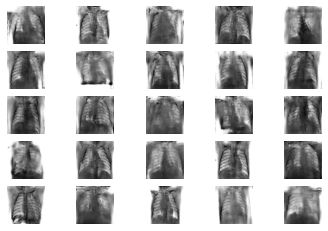

In [55]:
from matplotlib import pyplot
# plot the result
save_plot(X, 5)

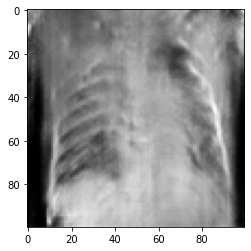

In [56]:
pyplot.imshow(X[555, :, :, 0], cmap='gray')

In [57]:
XX = X*255
labelss = np.array(labels.astype(float))

In [58]:
ntrainy = np.concatenate((trainyy,labelss))

In [59]:
ntrainx = np.concatenate((trainx,XX.astype(int)))

In [60]:
tx,vx,ty,vy=train_test_split(ntrainx,ntrainy)
ty = tf.keras.utils.to_categorical(ty,3)
vy = tf.keras.utils.to_categorical(vy,3)

# Save GAN Images

In [68]:
for i in range(5000):
    if labelss[i]==0:
        im = Image.fromarray(XX[i].reshape(100,100))
        im.convert("L").save("xray/CGAN/PNEUMONIA/IMA%s.png"%(i))
        print(i)
    if labelss[i]==1:
        im = Image.fromarray(XX[i].reshape(100,100))
        im.convert("L").save("xray/CGAN/COVID/IMA%s.png"%(i))
        print(i)
    if labelss[i]==2:
        im = Image.fromarray(XX[i].reshape(100,100))
        im.convert("L").save("xray/CGAN/NORMAL/IMA%s.png"%(i))
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119


3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924


# Test After GAN

In [73]:
tf.random.set_seed(1234)
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5) # to prevent overfitting

model=tf.keras.Sequential(
[
    layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Dropout(0.25),
            
    layers.Conv2D(40, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(8, 8)),
    layers.Dropout(0.2),  
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3,activation='softmax')

    
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
mod=model.fit(tx,ty,validation_data=(vx,vy),batch_size = 300, epochs=40,callbacks=[es])

Train on 8211 samples, validate on 2737 samples
Epoch 1/40
8211/8211 [==============================] - 3s 389us/sample - loss: 8.0916 - accuracy: 0.4043 - val_loss: 1.0864 - val_accuracy: 0.3124
Epoch 2/40
8211/8211 [==============================] - 3s 330us/sample - loss: 0.9593 - accuracy: 0.5381 - val_loss: 0.9536 - val_accuracy: 0.6039
Epoch 3/40
8211/8211 [==============================] - 3s 327us/sample - loss: 0.7528 - accuracy: 0.6758 - val_loss: 0.7831 - val_accuracy: 0.6682
Epoch 4/40
8211/8211 [==============================] - 3s 328us/sample - loss: 0.5537 - accuracy: 0.7808 - val_loss: 0.6345 - val_accuracy: 0.7234
Epoch 5/40
8211/8211 [==============================] - 3s 328us/sample - loss: 0.5068 - accuracy: 0.7975 - val_loss: 0.6600 - val_accuracy: 0.7128
Epoch 6/40
8211/8211 [==============================] - 3s 327us/sample - loss: 0.4573 - accuracy: 0.8201 - val_loss: 0.5922 - val_accuracy: 0.7790
Epoch 7/40
8211/8211 [==============================] - 3s 327us

In [75]:
pred=model.predict_classes(testx)
mys = []
l=0
for i in range(len(pred)):
    if pred[i]==testyy[i]:
        mys.append(1)
        l+=1
    else:
        mys.append(0)
print("Accuracy: ",l/len(testx))

Accuracy:  0.8883666274970623
